In [301]:
import pandas as pd
import pandas_datareader as pdr 
from datetime import datetime
import yfinance as yf

In [302]:
import yfinance as yf

df_tesla = yf.download("TSLA", start="2020-01-01", end="2023-12-31", auto_adjust=False)

df_tesla.columns = df_tesla.columns.get_level_values(0)
df_tesla.columns = df_tesla.columns.str.lower()

print("Columns:", df_tesla.columns.tolist())

# Sometimes adj close column is named with underscore or space
# Let's try to fix that
if 'adj close' in df_tesla.columns:
    df_tesla.rename(columns={'adj close': 'adj_close'}, inplace=True)

# Check final columns again after renaming
print("Columns after renaming:")
print(df_tesla.columns.tolist())

desired_order = ['high', 'low', 'open', 'close', 'volume', 'adj_close']

# Filter columns that exist (to avoid KeyError)
existing_cols = [col for col in desired_order if col in df_tesla.columns]

df_tesla = df_tesla[existing_cols]

df_tesla.head()


[*********************100%***********************]  1 of 1 completed

Columns: ['adj close', 'close', 'high', 'low', 'open', 'volume']
Columns after renaming:
['adj_close', 'close', 'high', 'low', 'open', 'volume']


Price,high,low,open,close,volume,adj_close
Date,,,,,,
2020-01-02,28.713333,28.114000,28.299999,28.684000,142981500,28.684000
2020-01-03,30.266666,29.128000,29.366667,29.534000,266677500,29.534000
2020-01-06,30.104000,29.333332,29.364668,30.102667,151995000,30.102667
2020-01-07,31.441999,30.224001,30.760000,31.270666,268231500,31.270666
2020-01-08,33.232666,31.215334,31.580000,32.809334,467164500,32.809334


<Axes: xlabel='Date'>

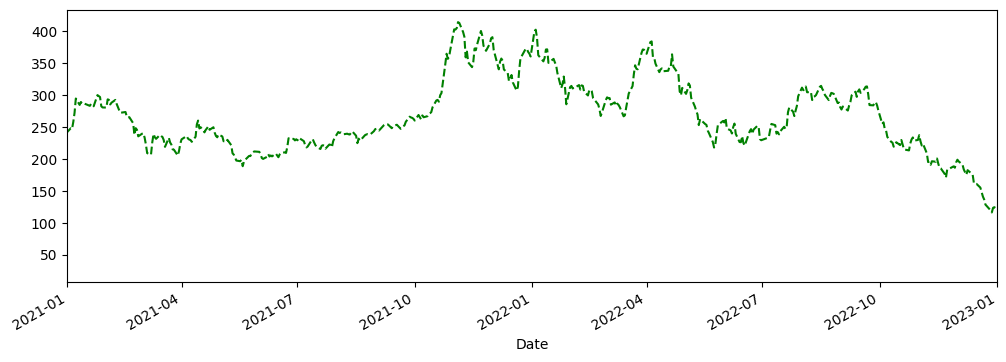

In [303]:
df_tesla["high"].plot(xlim=['2021-01-01','2023-01-01'],figsize=(12,4),c="green",ls="--")

In [304]:
df_tesla.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [305]:
index=df_tesla.loc['2021-01-01':'2021-09-01'].index

In [306]:
share_open = df_tesla.loc['2021-01-01':'2021-09-01']["open"]
share_open

Date
2021-01-04    239.820007
2021-01-05    241.220001
2021-01-06    252.830002
2021-01-07    259.209991
2021-01-08    285.333344
                 ...    
2021-08-26    236.103333
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
2021-09-01    244.693329
Name: open, Length: 168, dtype: float64

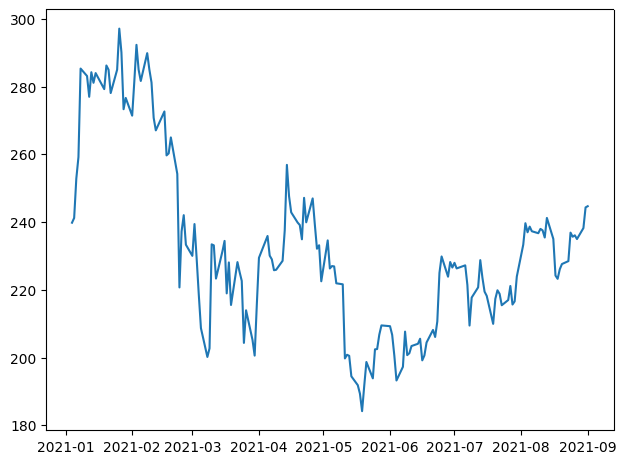

In [307]:
import matplotlib.pyplot as plt
figure,axis=plt.subplots()
plt.tight_layout() #prevents overlapping
figure.autofmt_xdate
axis.plot(index,share_open)


In [308]:
df_tesla.reset_index()

Price,Date,high,low,open,close,volume,adj_close
0,2020-01-02,28.713333,28.114000,28.299999,28.684000,142981500,28.684000
1,2020-01-03,30.266666,29.128000,29.366667,29.534000,266677500,29.534000
2,2020-01-06,30.104000,29.333332,29.364668,30.102667,151995000,30.102667
3,2020-01-07,31.441999,30.224001,30.760000,31.270666,268231500,31.270666
4,2020-01-08,33.232666,31.215334,31.580000,32.809334,467164500,32.809334
...,...,...,...,...,...,...,...
1001,2023-12-22,258.220001,251.369995,256.760010,252.539993,93370100,252.539993
1002,2023-12-26,257.970001,252.910004,254.490005,256.609985,86892400,256.609985
1003,2023-12-27,263.339996,257.519989,258.350006,261.440002,106494400,261.440002
1004,2023-12-28,265.130005,252.710007,263.660004,253.179993,113619900,253.179993


In [309]:
#DAte Time 
from datetime import datetime
datetime.now()
date = datetime(2021,7,1)
print(date.weekday())

3


Time Resampling

C:\Users\Admin\AppData\Local\Temp\ipykernel_15644\145772086.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_tesla["open"].resample(rule='M').mean().plot(kind='bar',figsize = (12,4))


<Axes: xlabel='Date'>

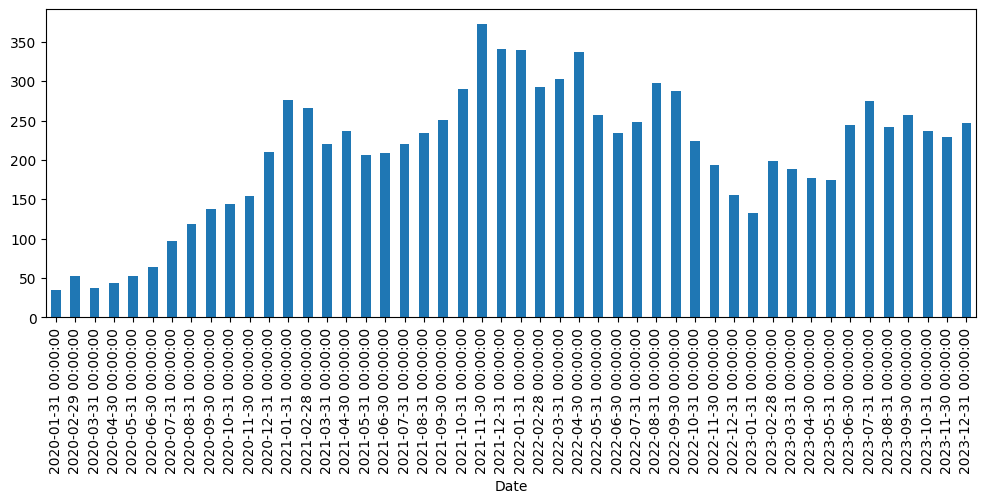

In [310]:
#Time Resampling
df_tesla["open"].resample(rule='M').mean().plot(kind='bar',figsize = (12,4))

In [311]:
df_tesla["open : 30days rolling"]=df_tesla["open"].rolling(30).mean()

In [312]:
df_tesla.head(31)

Price,high,low,open,close,volume,adj_close,open : 30days rolling
Date,,,,,,,
2020-01-02,28.713333,28.114000,28.299999,28.684000,142981500,28.684000,NaN
2020-01-03,30.266666,29.128000,29.366667,29.534000,266677500,29.534000,NaN
2020-01-06,30.104000,29.333332,29.364668,30.102667,151995000,30.102667,NaN
2020-01-07,31.441999,30.224001,30.760000,31.270666,268231500,31.270666,NaN
2020-01-08,33.232666,31.215334,31.580000,32.809334,467164500,32.809334,NaN
2020-01-09,33.253334,31.524668,33.139999,32.089333,426606000,32.089333,NaN
2020-01-10,32.329334,31.580000,32.119331,31.876667,194392500,31.876667,NaN
2020-01-13,35.042000,32.799999,32.900002,34.990665,397764000,34.990665,NaN
2020-01-14,36.493999,34.993332,36.284000,35.861332,434943000,35.861332,NaN


<Axes: xlabel='Date'>

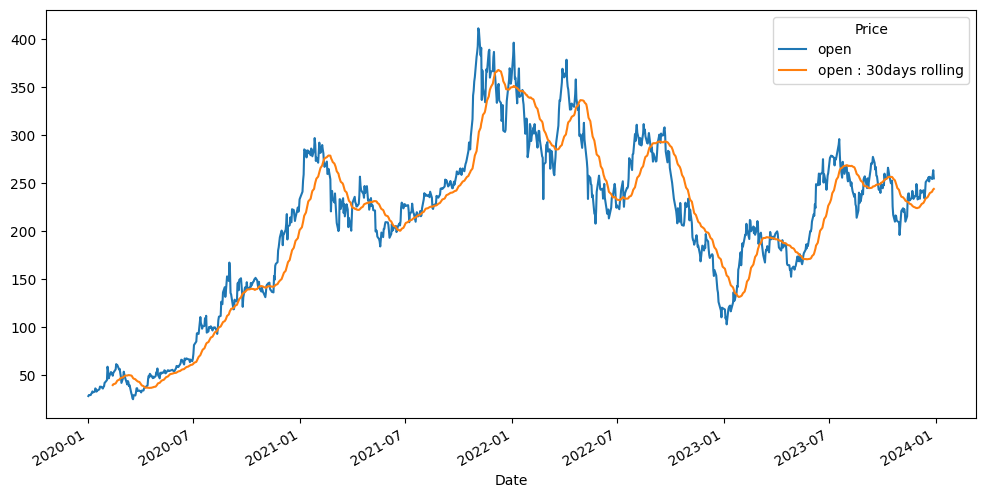

In [313]:
df_tesla[["open","open : 30days rolling"]].plot(figsize=(12,6))

In [314]:
import yfinance as yf
import pandas as pd

# Download Microsoft stock data
df_msft = yf.download("MSFT", start="2017-01-01", end="2022-12-31", auto_adjust=False)

# If MultiIndex, flatten it
if isinstance(df_msft.columns, pd.MultiIndex):
    df_msft.columns = df_msft.columns.get_level_values(0)

# Convert columns to lowercase and replace spaces with underscores
df_msft.columns = [col.lower().replace(' ', '_') for col in df_msft.columns]

# Rename if necessary
if 'adj close' in df_msft.columns:
    df_msft.rename(columns={'adj close': 'adj_close'}, inplace=True)

# Arrange columns in the desired order
desired_columns = ['high', 'low', 'open', 'close', 'volume', 'adj_close']
df_msft = df_msft[[col for col in desired_columns if col in df_msft.columns]]

# Display first few rows
print(df_msft.head())


[*********************100%***********************]  1 of 1 completed

                 high        low       open      close    volume  adj_close
Date                                                                       
2017-01-03  62.840000  62.130001  62.790001  62.580002  20694100  56.497421
2017-01-04  62.750000  62.119999  62.480000  62.299999  21340000  56.244629
2017-01-05  62.660000  62.029999  62.189999  62.299999  24876000  56.244629
2017-01-06  63.150002  62.040001  62.299999  62.840000  19922900  56.732132
2017-01-09  63.080002  62.540001  62.759998  62.639999  20382700  56.551567


In [315]:
df_msft.tail()

,high,low,open,close,volume,adj_close
Date,,,,,,
2022-12-23,238.869995,233.940002,236.110001,238.729996,21207000,233.975861
2022-12-27,238.929993,235.830002,238.699997,236.960007,16688600,232.241119
2022-12-28,239.720001,234.169998,236.889999,234.529999,17457100,229.859543
2022-12-29,241.919998,235.649994,235.649994,241.009995,19770700,236.210464
2022-12-30,239.960007,236.660004,238.210007,239.820007,21938500,235.044174


In [316]:
df_msft.head()

,high,low,open,close,volume,adj_close
Date,,,,,,
2017-01-03,62.840000,62.130001,62.790001,62.580002,20694100,56.497421
2017-01-04,62.750000,62.119999,62.480000,62.299999,21340000,56.244629
2017-01-05,62.660000,62.029999,62.189999,62.299999,24876000,56.244629
2017-01-06,63.150002,62.040001,62.299999,62.840000,19922900,56.732132
2017-01-09,63.080002,62.540001,62.759998,62.639999,20382700,56.551567


In [319]:
max_price = df_msft.loc['2017-01-01':'2022-12-30']['high'].idxmax()

In [320]:
print(max_price)

2021-11-22 00:00:00


In [355]:
# print(df_msft.loc["2021-11-22"]["high"])
min_price = df_msft["low"].idxmin()
# min_price_low = df_msft.loc(min_price)
print(min_price)

2017-01-12 00:00:00
